Problem statement:

You will roll two dice from the two bags, and each bag contains three biased dice.

bag1 = [[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]]


bag2 = [[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]]

The dice in the two bags are paired: if you pick the second die in bag1, you will also pick the second die in bag2. In each trial:

*   You pick one pair of dice from the two bags randomly and roll them

*   Success occurs if the points on dice1 and dice2 add up to eight; otherwise, failure.

Your task is to write a function called roll_paired_biased_dice()and to use this function to calculate the probabilities of success for each unique combination of points on dice1 and dice2.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [55]:
bag1 = np.array([[1, 2, 3, 6, 6, 6], [1, 2, 3, 4, 4, 6], [1, 2, 3, 3, 3, 5]])
bag2 = np.array([[2, 2, 3, 4, 5, 6], [3, 3, 3, 4, 4, 5], [1, 1, 2, 4, 5, 5]])

def roll_paired_biased_dice(n, seed=1231):
    random.seed(seed)
    results={}

    for i in range(n):
      bag_index = random.randint(0,1) # 0 to 1, sine there are only 2 bags

      # obtain the dice indices (since there are 6 sides to each die, the range would be from 0 to 5)
      dice_index1 = random.randint(0, 5)
      dice_index2 = random.randint(0, 5)

      # Sample a pair of dice from bag1 and bag2
      point1 = bag1[bag_index][dice_index1]
      point2 = bag2[bag_index][dice_index2]
      #print(f"Points for iteration {i}: point1={point1}, point2={point2}")

      key = "%s_%s" % (point1, point2)
      if point1 + point2 == 8:
            if key not in results:
                results[key] = 1
            else:
                results[key] += 1
    return(pd.DataFrame.from_dict({"dice1_dice2":results.keys(),
		"probability_of_success":np.array(list(results.values()))*100.0/n}))
    print(f"Generated key: {key}")
    print(f"Results so far: {results}")



Running the simulation for 10000 times.

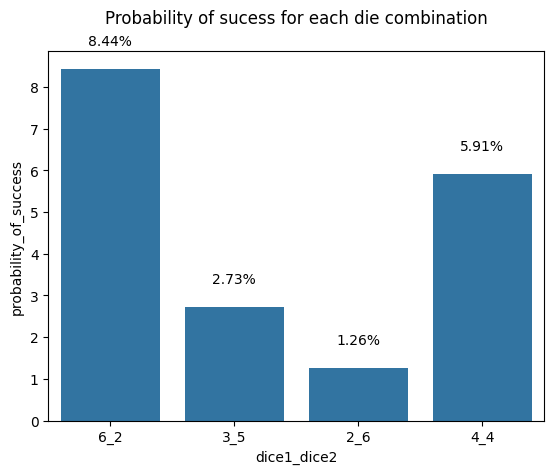

In [62]:
# Run the simulation 10,000 times and assign the result to df_results
df_results = roll_paired_biased_dice(10000)
ax = sns.barplot(x="dice1_dice2", y="probability_of_success", data=df_results)

# Add percentages on top of each bar
for bar, percentage in zip(ax.patches, df_results["probability_of_success"]):
    x = bar.get_x() + bar.get_width() / 2.0
    y = bar.get_height()
    ax.text(x, y + 0.5, f"{percentage:.2f}%", ha='center', va='bottom', fontsize=10)

# To add soace between the title and the plot use: pad = ---
plt.title("Probability of sucess for each die combination", pad=20)
plt.show()